In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [11]:
from keras.layers import Dense, SimpleRNN, Embedding
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 20s 127ms/step - loss: 0.5741 - accuracy: 0.6958 - val_loss: 0.4406 - val_accuracy: 0.8160
Epoch 2/10
157/157 [==============================] - 20s 126ms/step - loss: 0.3527 - accuracy: 0.8566 - val_loss: 0.3571 - val_accuracy: 0.8514
Epoch 3/10
157/157 [==============================] - 20s 126ms/step - loss: 0.2668 - accuracy: 0.8989 - val_loss: 0.3385 - val_accuracy: 0.8680
Epoch 4/10
157/157 [==============================] - 19s 123ms/step - loss: 0.2018 - accuracy: 0.9230 - val_loss: 0.4340 - val_accuracy: 0.8012
Epoch 5/10
157/157 [==============================] - 20s 127ms/step - loss: 0.1535 - accuracy: 0.9467 - val_loss: 0.3669 - val_accuracy: 0.8612
Epoch 6/10
157/157 [==============================] - 20s 126ms/step - loss: 0.1113 - accuracy: 0.9616 - val_loss: 0.4352 - val_accuracy: 0.8284
Epoch 7/10
157/157 [==============================] - 19s 122ms/step - loss: 0.0683 - accuracy: 0.9793 - val_loss: 0.4843 - val_ac

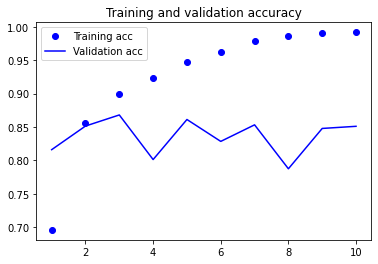

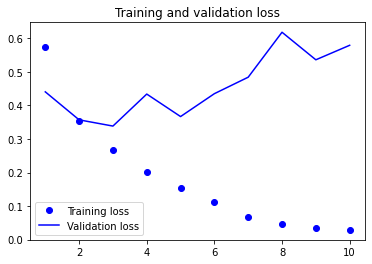

In [12]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
